# Payton Burks - Spotify Data

### Raw data -> DataFrame & CSV

In [34]:
import json
import pandas as pd
import matplotlib.pyplot as plt

import utils
import spotutils

#load in data
data0 = utils.load_data("StreamingHistoryJsonFiles/StreamingHistory0.json")
data1 = utils.load_data("StreamingHistoryJsonFiles/StreamingHistory1.json")
data2 = utils.load_data("StreamingHistoryJsonFiles/StreamingHistory2.json")
data3 = utils.load_data("StreamingHistoryJsonFiles/StreamingHistory3.json")
data4 = utils.load_data("StreamingHistoryJsonFiles/StreamingHistory4.json")
data5 = utils.load_data("StreamingHistoryJsonFiles/StreamingHistory5.json")

#join all data into spot_df
spot_df = pd.concat([data0, data1, data2, data3, data4, data5], ignore_index=True)

#clean data   
utils.clean_spot_df(spot_df)
utils.rm_pod(spot_df)

spot_df = spot_df.reset_index(drop=True)

#data to csv
spot_df.to_csv("cleanspotifydata.csv")

### Append Days of the Week

In [35]:
#get dates from data
raw_dates = utils.get_date_list(spot_df)

#combine dates with findDay
day_of_week = []
for item in raw_dates:
    newEntry = utils.findDay(item)
    day_of_week.append(newEntry)

#append day_of_week to spot_df
spot_df["day"] = day_of_week

### Append "Skipped?" & Find number of skipped songs

In [36]:
#newvars
skipped = []
timeListen = spot_df["msPlayed"].copy()
numSkips = 0
totSongs = 0

#loop through data
for item in timeListen:
    secListened = item/1000
    if secListened < 30:
        skipped.append('y')
        numSkips += 1
        totSongs += 1
    else:
        skipped.append('n')
        totSongs += 1
        
#append data
spot_df["skipped?"] = skipped

print("Number of songs skipped:", numSkips)
print("Percent of songs skipped:", round((numSkips/totSongs),4)*100, '%')

Number of songs skipped: 11952
Percent of songs skipped: 21.02 %


### Artist x Hours Listened Data

In [41]:
bigtotal = 0
totalHours_perArtist = []
artist_perArtist = []
group_by_artist_df = spot_df.groupby("artistName")

for artist, group_df in group_by_artist_df:
    msplayed_ser = group_df["msPlayed"].copy()
    totalms = msplayed_ser.sum()
    totalhours = totalms/1000/60/60
    bigtotal += totalhours
    
    #data for new df for hours x artist
    totalHours_perArtist.append(round(totalhours, 2))
    artist_perArtist.append(artist)
    
artist_x_hours_df = utils.create_artist_x_hours_df(artist_perArtist, totalHours_perArtist)

print("Total hours listened to:", round(bigtotal))
print("Total days:", round(bigtotal/24))

Total hours listened to: 2178
Total days: 91


### Append "Top 100 Artist?"

In [39]:
#new vars
top100YorN = []
artist_data = spot_df["artistName"].copy()
artist_data = artist_data.to_list()
top100 = artist_x_hours_df.iloc[0:101]["Artist"].copy()

#loop through data
for artist in artist_data:
    artistIsIn = False
    for item in top100:
        if item == artist:
            artistIsIn = True
            break
    if artistIsIn == True:
        top100YorN.append('y')
    else:
        top100YorN.append('n')
#append        
spot_df["top100Artist?"] = top100YorN

#send to csv
spot_df.to_csv('finalspotifydata.csv')

### List of all artists

In [5]:
#get all names of artists
artist_name_list = []

for artist, group_df in group_by_artist_df:
    artist_in_list = False
    for i in range(len(artist_name_list)):
        if(artist == artist_name_list[i]):
            artist_in_list == True
            
    if artist_in_list == False:
        artist_name_list.append(artist)
        
text_file = open("ArtistList.txt", 'w')
for i in range(len(artist_name_list)):
    artist = str(artist_name_list[i])
    if artist == 'Yunggoth✰':
        artist = 'Yunggoth'
    if artist == "μ's":
        artist = "u's"
    text_file.write(artist + "\n")
text_file.close()

print("Payton has listened to", len(artist_name_list), "unique artists over the past year.")

Payton has listened to 1663 unique artists over the past year.


### Artist Graphs

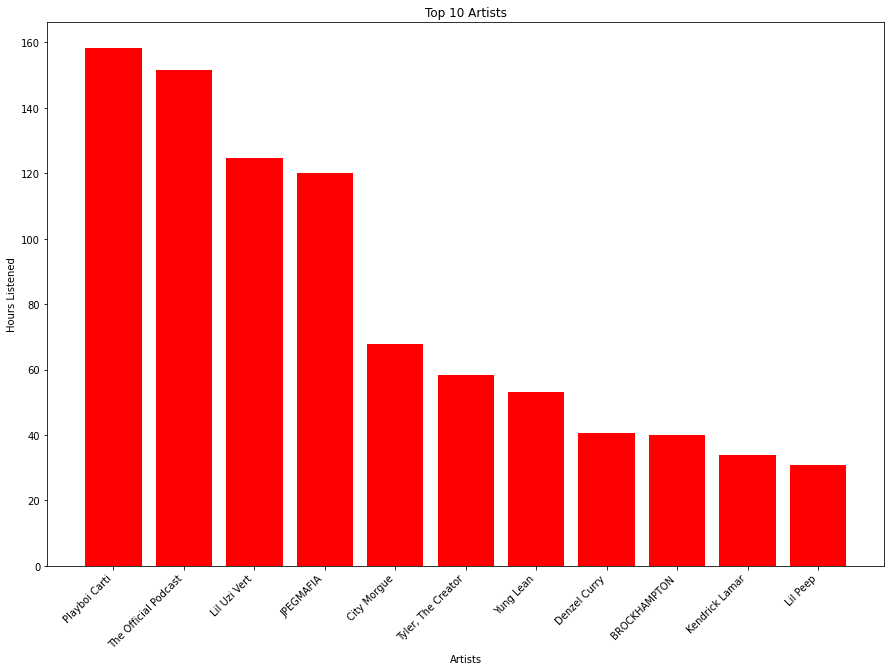

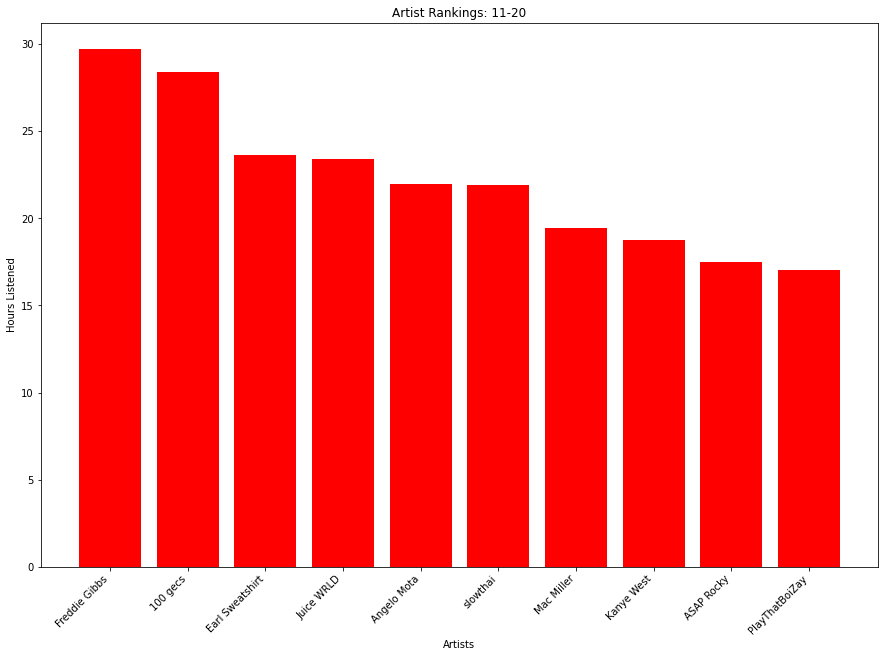

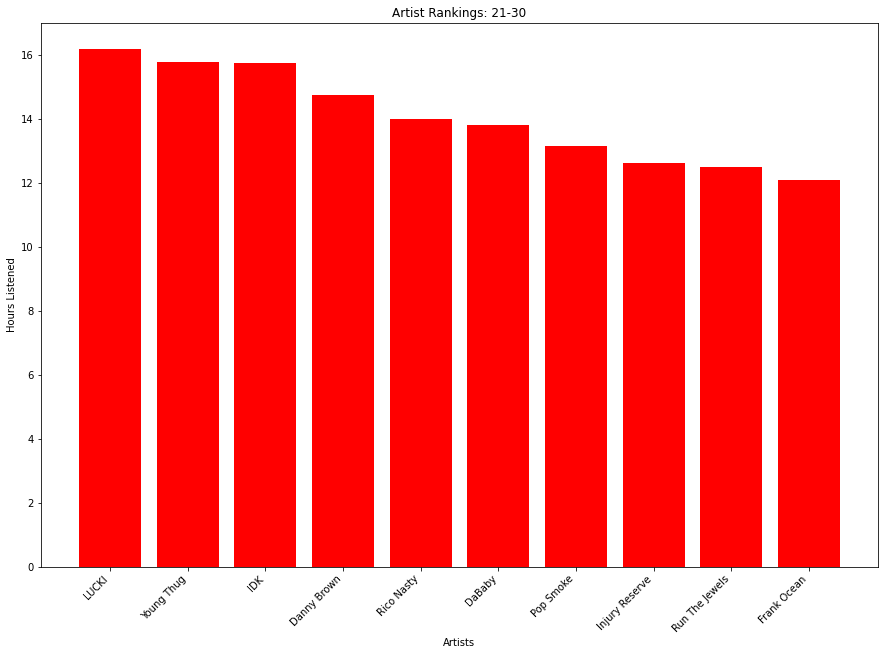

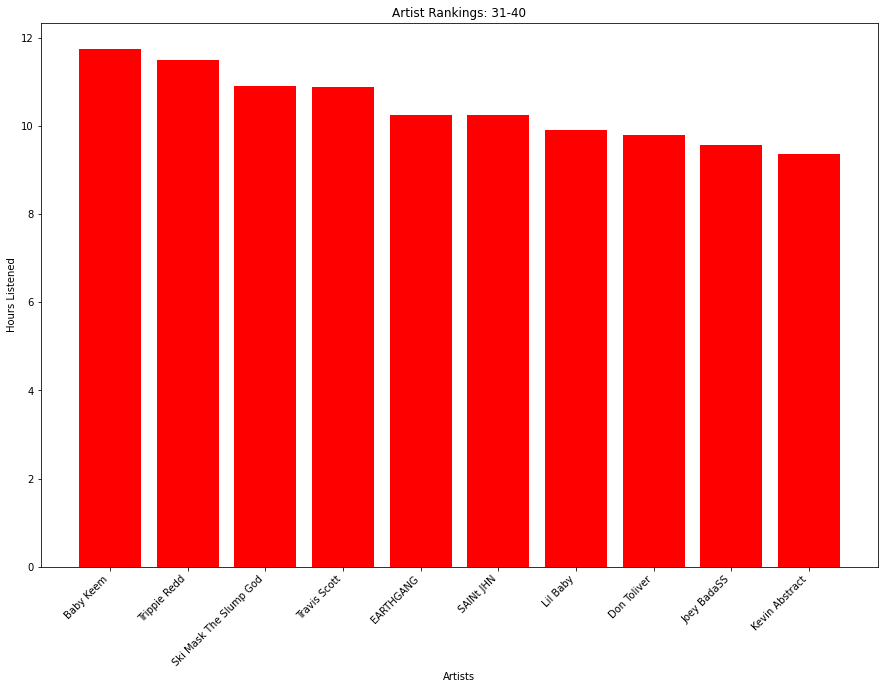

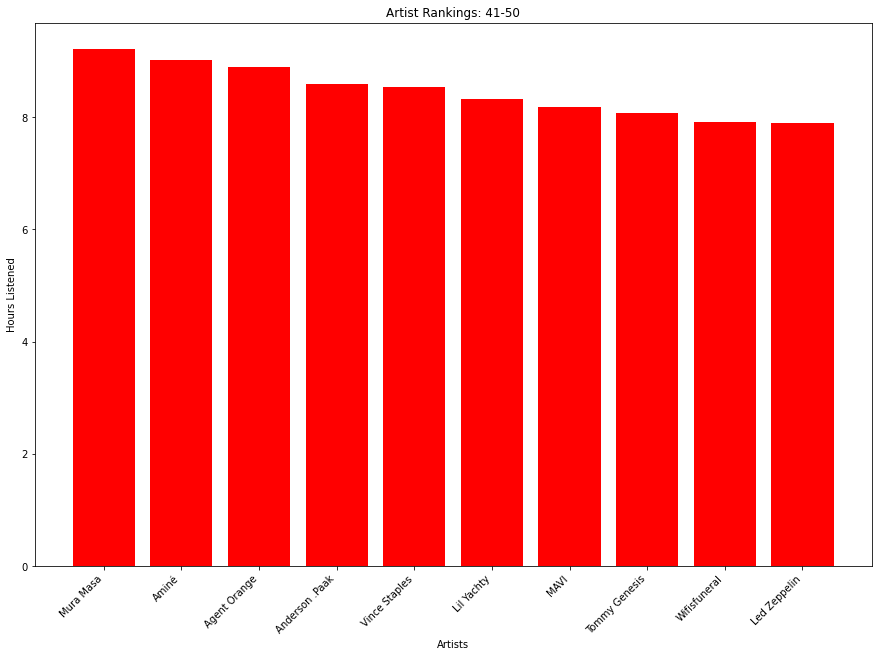

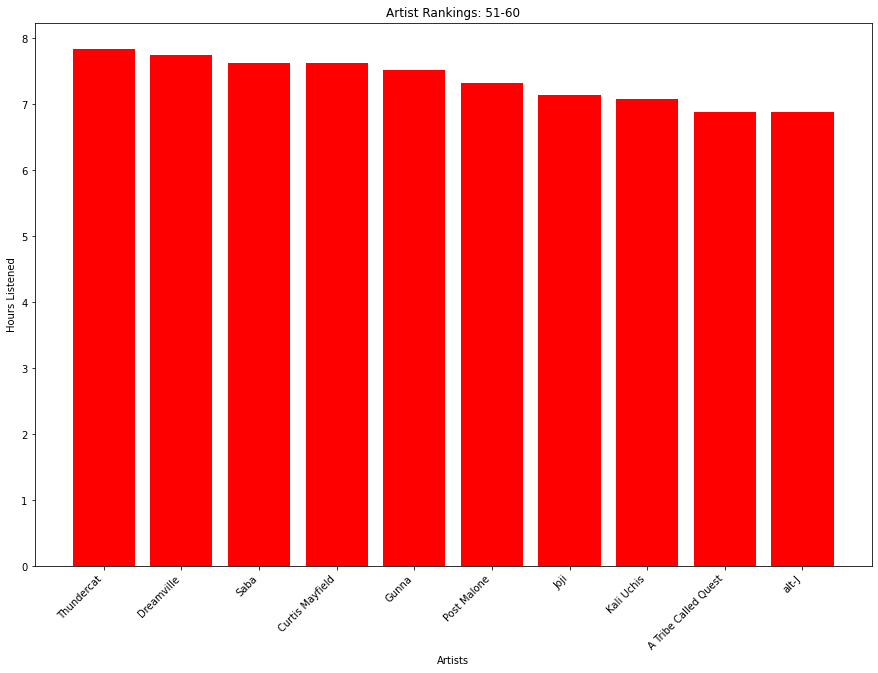

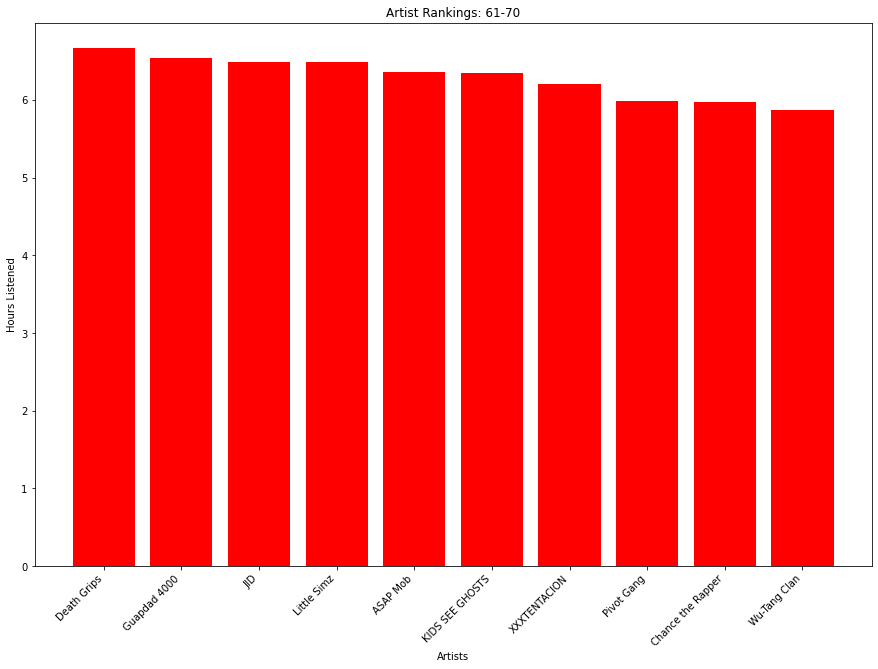

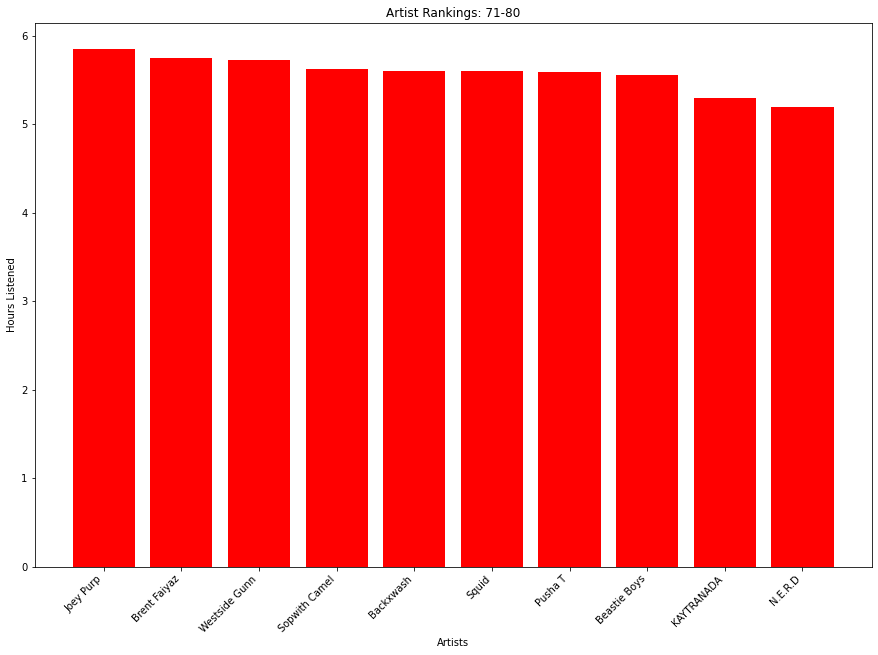

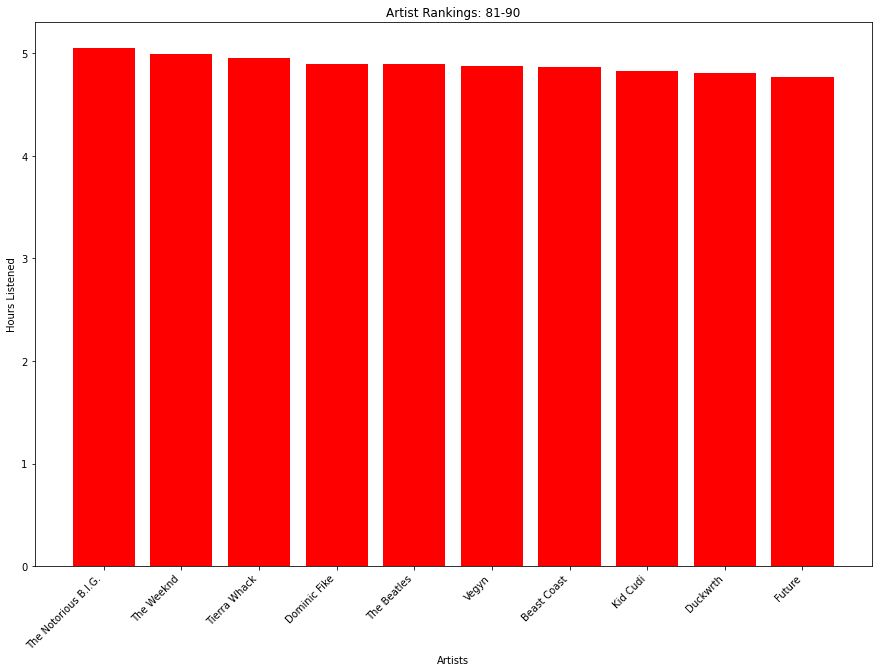

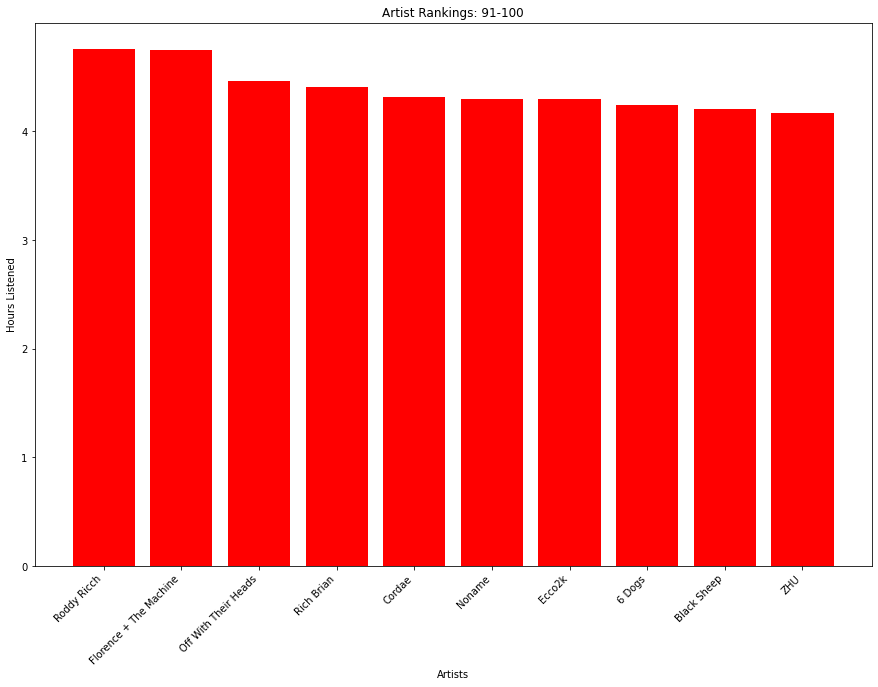

In [6]:
#artists 1-100
top_10_artists = artist_x_hours_df.iloc[0:11]
through_20_artists = artist_x_hours_df.iloc[11:21].reset_index()
through_30_artists = artist_x_hours_df.iloc[21:31].reset_index()
through_40_artists = artist_x_hours_df.iloc[31:41].reset_index()
through_50_artists = artist_x_hours_df.iloc[41:51].reset_index()
through_60_artists = artist_x_hours_df.iloc[51:61].reset_index()
through_70_artists = artist_x_hours_df.iloc[61:71].reset_index()
through_80_artists = artist_x_hours_df.iloc[71:81].reset_index()
through_90_artists = artist_x_hours_df.iloc[81:91].reset_index()
through_100_artists = artist_x_hours_df.iloc[91:101].reset_index()

#plots
utils.artist_bar_chart(top_10_artists, "1-10", "Top 10 Artists")
utils.artist_bar_chart(through_20_artists, "11-20", "Artist Rankings: 11-20")
utils.artist_bar_chart(through_30_artists, "21-30", "Artist Rankings: 21-30")
utils.artist_bar_chart(through_40_artists, "31-40", "Artist Rankings: 31-40")
utils.artist_bar_chart(through_50_artists, "41-50", "Artist Rankings: 41-50")
utils.artist_bar_chart(through_60_artists, "51-60", "Artist Rankings: 51-60")
utils.artist_bar_chart(through_70_artists, "61-70", "Artist Rankings: 61-70")
utils.artist_bar_chart(through_80_artists, "71-80", "Artist Rankings: 71-80")
utils.artist_bar_chart(through_90_artists, "81-90", "Artist Rankings: 81-90")
utils.artist_bar_chart(through_100_artists, "91-100", "Artist Rankings: 91-100")

### Percentage of Music: Top 100 or not

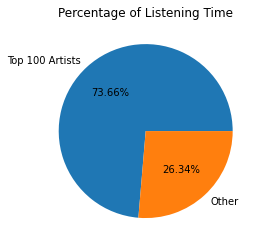

In [10]:
msPlayed_top100 = 0
msPlayed_non100 = 0
msPlayedList = timeListen.to_list()

i=0
while i in range(len(top100YorN)):
    if top100YorN[i] == 'y':
        msPlayed_top100 += msPlayedList[i]
    else:
        msPlayed_non100 += msPlayedList[i]
    i+=1

plt.figure()
x = ["Top 100 Artists", "Other"]
y = [msPlayed_top100/(msPlayed_top100+msPlayed_non100), msPlayed_non100/(msPlayed_top100+msPlayed_non100)]
plt.pie(y, labels=x, autopct="%1.2f%%")
plt.title("Percentage of Listening Time")
plt.savefig("Figures/percentageofmusic.png")
plt.show()

### Average Listening Hours for Day of Week

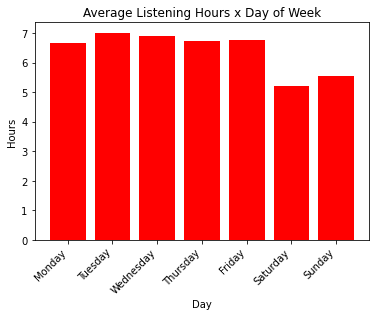

In [9]:
import numpy as np

group_by_weekday_df = spot_df.groupby("weekday", sort=False)
for group_name, group_df in group_by_weekday_df:
    msplayed_ser = group_df["msPlayed"].copy()
    totalms = msplayed_ser.sum()
    total_hours = totalms/1000/60/60/52
    plt.bar(group_name, total_hours,color="red")

plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Average Listening Hours x Day of Weekv c9i0
plt.ylabel("Hours")
plt.savefig("Figures/averagelistening_per_dayofweek.png")
plt.show()

### Hypothesis Testing

I will be testing whether there is a significantly lower mean listening time on weekends versus on weekdays. I will be using $\alpha = 0.01$ as the level of significance.
* H0: $M_{Weekend} \geq M_{Weekday}$
* HA: $M_{Weekend} < M_{Weekday}$

In [28]:
mean_hours_weekday = []
mean_hours_weekend = []

for group_name, group_df in group_by_weekday_df:
    ms_played_ser = group_df["msPlayed"].copy()
    totalms = ms_played_ser.sum()
    totalhours = round(totalms/1000/60/60/52, 2)
    if group_name == 'Saturday' or group_name == 'Sunday':
        mean_hours_weekend.append(totalhours)
    elif group_name == 'Monday' or group_name == 'Tuesday' or group_name == 'Wednesday' or group_name == 'Thursday' or group_name == 'Friday':
        mean_hours_weekday.append(totalhours)

#one-tail t-test for population mean from independent samples
import scipy.stats as stats

t_computed, p_val = stats.ttest_ind(mean_hours_weekend, mean_hours_weekday)
print("t-value:", t_computed, "// p-value:", p_val/2)

t-value: -10.466708483332454 // p-value: 6.865308716099412e-05


With a p-value less than 0.01, we have sufficient evidence to reject the null hypothesis. Thus, we have enough evidence to prove that there is a lower mean listening time on weekends as opposed to weekdays.

### More Hypothesis Testing

I will also be testing if the average length of the songs I listened to was different than the average length of songs, which The Verge reported at 222 seconds. I will again be using $\alpha = 0.01$ as the level of significance.
* H0: $M_{M} = M_{W}$
* HA: $M_{M} \neq M_{W}$

**M = my average song length; W = worldwide average song length*

In [71]:
#compute my avg song length
#must exclude songs I skipped
tot = 0
noskip_list = []
group_by_skipped_df = spot_df.groupby("skipped?")
for group_name, group_df in group_by_skipped_df:
    if group_name == 'n':
        msPlayed_noskip_ser = group_df['msPlayed']
        for item in msPlayed_noskip_ser:
            noskip_list.append(round(item/1000))
print("Average length of my songs:", round(np.mean(noskip_list)), "seconds")
t_computed, p_val = stats.ttest_1samp(noskip_list, 222)
print("t-value:", t_computed, "// p-value:", p_val)

Average length of my songs: 184 seconds
t-value: -36.56615308237172 // p-value: 1.6628290309120445e-288


With a p-value less than 0.01, we have significant evidence to reject the null hypothesis. Thus, we have enough evidence to say that the average length of my songs was different than the average length of top songs worldwide.